In [1]:
!wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
!unzip glove.6B.zip

--2023-09-11 12:29:51--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.00MB/s    in 2m 39s  

2023-09-11 12:32:30 (5.17 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [2]:
import numpy as np
import os



glove_dir = '.'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

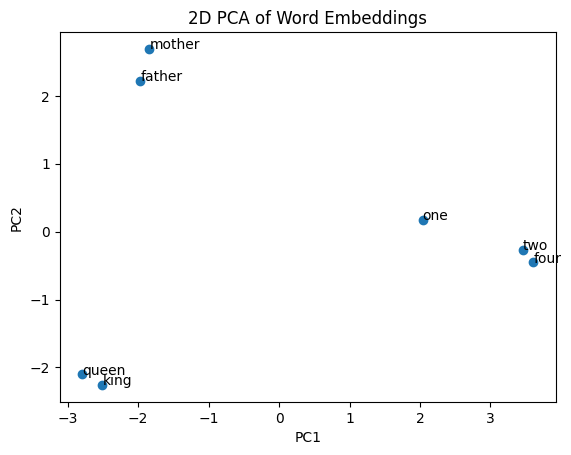

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# List of words
words = ["father", "mother", "king", "queen", "one", "two", "four"]

# Get word embeddings
embeddings = [embeddings_index[word] for word in words]

# Convert embeddings to 2D array
X = np.array(embeddings)

# Apply PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X)

# Plot PCA results
plt.scatter(components[:, 0], components[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (components[i, 0], components[i, 1]))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA of Word Embeddings")
plt.show()
